### 농구선수의 게임 데이터를 활용하여 포지션 예측을 위한 데이터 정제
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [1]:
import pandas as pd

In [38]:
df = pd.read_csv("../Data/basketball.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


&nbsp;&nbsp;&nbsp;&nbsp;<b>컬럼 소개</b>
- Player : 선수 이름
- Pos : 포지션(SG : Shooting Guard, C: Center)
- 3P : 한 경기당 평균 3점슛 성공횟수
- 2P : 한 경기당 평균 2점슛 성공횟수
- TRB : 한 경기당 평균 리바운드(*누가 슛을 쐈는데 골대맞고 튄 공을 가로채는 거) 성공횟수 
- AST : 한 경기당 평균 어시스트 성공횟수
- STL : 한 경기당 평균 스틸 성공횟수
- BLK : 한 경기당 평균 블로킹 성공횟수

In [3]:
# 포지션의 종류 파악 
df['Pos'].unique()

array(['SG', 'C'], dtype=object)

In [9]:
# 포지션별 갯수 파악
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 포지션 별 내용
- C : 골대, 포스트 근처에서 슛을 블로킹하고 리바운드하며 바깥으로 쳐내며 골대 근처에서 2점슛으로 득점을 한다.
- SG : 코트내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할


### 데이터 시각화
데이터를 특징을 바탕으로 한 공간에서 시각화 함으로써 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분

In [13]:
import matplotlib.pyplot as plt

In [14]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸, 2점슛 데이터 시각화

In [17]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

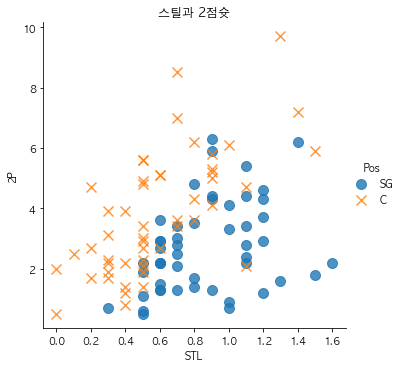

In [22]:
sns.lmplot(
    'STL',
    '2P',
    data = df,
    fit_reg=False, # 회귀선 안 쓸 경우(default val. = True)
    markers=['o','x'],
    scatter_kws={'s':100}, # 좌표상의 점의 크기
    hue = 'Pos' # 대상값
)
# STL과 2P 관련있는 포지션을 보기위해 seaborn 사용
plt.title('스틸과 2점슛')
plt.show()

# 어시스트와 2점슛 데이터 시각화

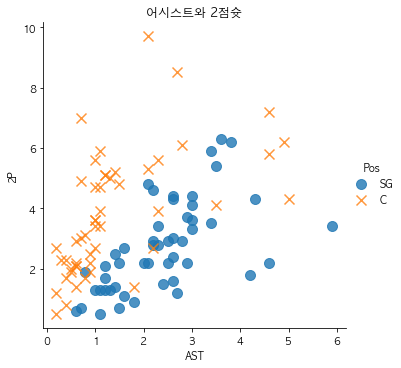

In [29]:
sns.lmplot(
    'AST',
    '2P',
    data=df,
    fit_reg=False,
    markers=['o','x'],
    scatter_kws={'s':100},
    hue='Pos'
)
plt.title("어시스트와 2점슛")
plt.show()

> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우 슈팅가드와 센터의<br>
> 경계가 너무 근접해서 분류하기에 모호하다.

# 블로킹과 3점슛

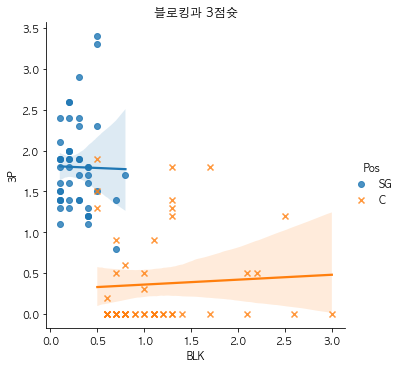

In [35]:
sns.lmplot(
    'BLK',
    '3P',
    data=df,
    hue='Pos',
    markers=['o','x']
)
plt.title('블로킹과 3점슛')
plt.show()

# 리바운드와 3점슛

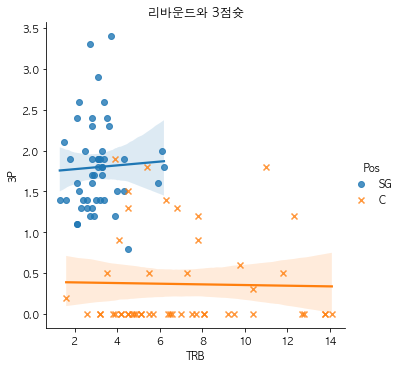

In [34]:
sns.lmplot(
    'TRB',
    '3P',
    data=df,
    hue='Pos',
    markers=['o','x']   
)
plt.title('리바운드와 3점슛')
plt.show()

> 회귀선이 수평으로 나타나는 것으로 보아 SG, C의 분리가 가능하다는 것을 말한다.<br><br>
> 동일한 분류끼리는 서로 근접해 있고, 다른 분류와는 멀리 떨어져 있음<br>
> 시각화한 결과에서 데이터의 구분이 확실한 경우 선택된 속성들이 머신러닝 정확도에 큰 도움을 준다.<br>

# 데이터 다듬기
: 분별력이 없는 특징(featrue)을 데이터에서 제거<br>
시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다.

In [39]:
# 분별력이 없는 특징(feature)제거
df.drop(columns=['2P','AST','STL'],axis=1,inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [45]:
# 학습데이터와 검증데이터로 나누기
from sklearn.model_selection import train_test_split

#train_data,test_data,train_label,test_label = train_test_split(df.iloc[:,1:],df.iloc[:,0])

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다.
train,test = train_test_split(df,test_size=0.2)

In [46]:
train.shape

(80, 5)

In [47]:
test.shape

(20, 5)

In [48]:
# 데이터 저장하기
train.to_csv("../Data/basketball_train.csv",index=False)
test.to_csv("../Data/basketbal_test.csv",index=False)